In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [30]:
#Load_data
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
df = pd.DataFrame(data.data, columns= data.feature_names)

In [32]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
df['target']= data['target']

In [37]:
df.head(75)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
70,5.9,3.2,4.8,1.8,1
71,6.1,2.8,4.0,1.3,1
72,6.3,2.5,4.9,1.5,1
73,6.1,2.8,4.7,1.2,1


In [7]:
#EDA

In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [10]:
#Split the data in x& y

In [11]:
x= df.drop('target', axis=1)

In [12]:
y = df.target

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [14]:
y = pd.get_dummies(y)

In [15]:
print(y)

     0  1  2
0    1  0  0
1    1  0  0
2    1  0  0
3    1  0  0
4    1  0  0
..  .. .. ..
145  0  0  1
146  0  0  1
147  0  0  1
148  0  0  1
149  0  0  1

[150 rows x 3 columns]


In [16]:
#Train_Test_Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# To resolve ovefitting

In [17]:
model = Sequential()
model.add(Dense(4,activation='relu',kernel_regularizer='l2',input_shape=(4,)))
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [18]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 12)                132       
                                                                 
 dense_4 (Dense)             (None, 3)                 39        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [19]:
#Compile the model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['acc'])

In [20]:
#model Training
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
4/4 [==============================] - 1s 150ms/step - loss: 1.2475 - acc: 0.3333 - val_loss: 1.2329 - val_acc: 0.3333
Epoch 2/5
4/4 [==============================] - 0s 19ms/step - loss: 1.2191 - acc: 0.3333 - val_loss: 1.2119 - val_acc: 0.3333
Epoch 3/5
4/4 [==============================] - 0s 22ms/step - loss: 1.2036 - acc: 0.3333 - val_loss: 1.1995 - val_acc: 0.3333
Epoch 4/5
4/4 [==============================] - 0s 21ms/step - loss: 1.1940 - acc: 0.3333 - val_loss: 1.1889 - val_acc: 0.3333
Epoch 5/5
4/4 [==============================] - 0s 19ms/step - loss: 1.1801 - acc: 0.3000 - val_loss: 1.1705 - val_acc: 0.3000


In [21]:
#evaluate the model
loss,acc= model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 36ms/step - loss: 1.1705 - acc: 0.3000


In [22]:
#Prediction
list1= [[5.1,3.5,1.4,0.2]]

In [23]:
a=model.predict(list1)
a

1/1 [==============================] - 0s 166ms/step


array([[0.3428542 , 0.34250793, 0.31463784]], dtype=float32)

In [24]:
print(np.argmax(a))

0


In [25]:
#plotting
import matplotlib.pyplot as plt

In [26]:
history.history

{'loss': [1.2475444078445435,
  1.219063639640808,
  1.203580379486084,
  1.194016933441162,
  1.1800780296325684],
 'acc': [0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.30000001192092896],
 'val_loss': [1.2328932285308838,
  1.211923599243164,
  1.1995251178741455,
  1.1889070272445679,
  1.1704872846603394],
 'val_acc': [0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.30000001192092896]}

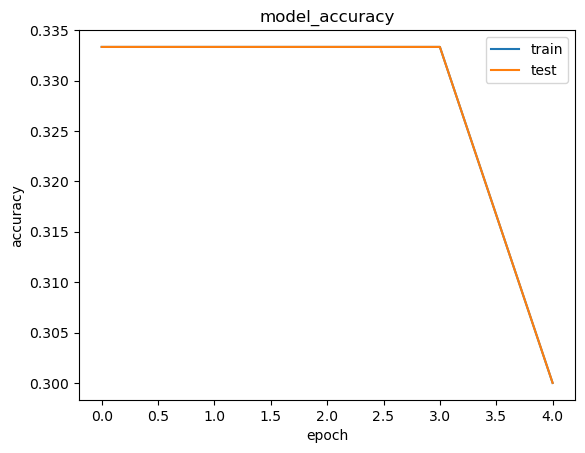

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])


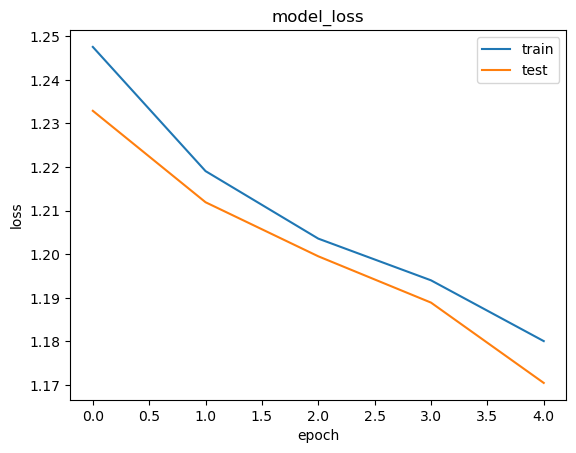

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])